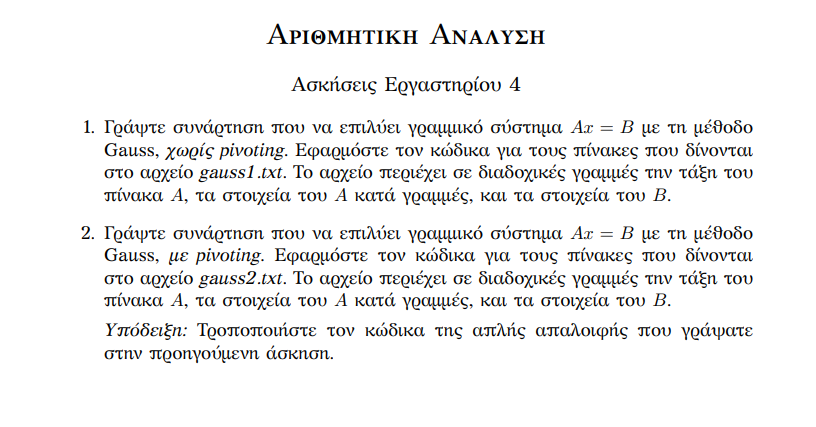

In [13]:
# ASKISI 1 XWRIS PIVONTG #κρασαρει δεν θα το χρησιμοποιησω, δεν μπηκα καν στον κοπο να το κανω μονη μου
import numpy


def triang(a, b):
    n = len(b)
    for k in range(n - 1):
        if abs(a[k, k]) < 1e-14:
            raise ZeroDivisionError(f"Μηδενικό pivot στο a[{k},{k}]! Δεν μπορεί να γίνει χωρίς pivoting.")

        for i in range(k + 1, n):
            ell = -a[i, k] / a[k, k]
            for j in range(k, n):
                a[i, j] += ell * a[k, j]
            b[i] += ell * b[k]
    return a, b

def backsub(a,b,x):
    "Οπισθοδρόμηση"
    if abs(a[i,i]) < 1e-14:
        raise ZeroDivisionError(f"Μηδενικό στοιχείο διαγωνίου στο a[{i},{i}].")
    
    n = len(b)
    for i in range(n-1,-1,-1):
        x[i] = b[i]
        for j in range(i+1,n):
            x[i] -= a[i,j] * x[j]
        
        x[i] /= a[i,i]
    return x

        

def main():
    f = open("C:/Users/souli/Downloads/gauss2.txt", "r")
    n = int(f.readline())

    x = numpy.ndarray(shape=(n), dtype=numpy.float64)

    a = numpy.fromfile(f, dtype=numpy.float64, count=n*n,sep=" ")
    a = numpy.reshape(a,newshape=(n,n))
    
    b = numpy.fromfile(f, dtype=numpy.float64, count=n,  sep=" ")

    f.close()
    
    a,b=triang(a,b)
    x=backsub(a,b,x)
    
    print (x)

main()

C:\Users\souli\AppData\Local\Temp\ipykernel_24172\1752490371.py:41: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  a = numpy.reshape(a,newshape=(n,n))


ZeroDivisionError: Μηδενικό pivot στο a[1,1]! Δεν μπορεί να γίνει χωρίς pivoting.

In [6]:
# ASKISI 2 me pivoting
import numpy as np

# Κανονικοποιεί κάθε γραμμή από τη θέση k και κάτω
def normalize_rows(a, b, k):
    n = len(b)
    for i in range(k, n):
        max_val = abs(b[i])
        for j in range(k, n):
            if abs(a[i, j]) > max_val:
                max_val = abs(a[i, j])
        for j in range(k, n):
            a[i, j] /= max_val
        b[i] /= max_val

# Ανταλλάσσει δύο γραμμές του πίνακα και του διανύσματος
def swap_rows(a, b, k, p):
    a[[k, p]] = a[[p, k]]
    b[k], b[p] = b[p], b[k]

# Επιλέγει την καλύτερη γραμμή για pivot και την ανεβάζει στη θέση k
def pivot(a, b, k):
    normalize_rows(a, b, k)
    n = len(b)
    best = k
    for i in range(k + 1, n):
        if abs(a[i, k]) > abs(a[best, k]):
            best = i
    if best != k:
        swap_rows(a, b, k, best)

# Τριγωνοποίηση με μέθοδο Gauss
def forward(a, b):
    n = len(b)
    for k in range(n - 1):
        pivot(a, b, k)
        for i in range(k + 1, n):
            factor = -a[i, k] / a[k, k]
            for j in range(k, n):
                a[i, j] += factor * a[k, j]
            b[i] += factor * b[k]

# Οπισθοδρόμηση για εύρεση λύσης
def back(a, b, x):
    n = len(b)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= a[i, j] * x[j]
        x[i] /= a[i, i]

# Εφαρμόζει τη μέθοδο Gauss για επίλυση του συστήματος
def solve_gauss(a, b, x):
    forward(a, b)
    back(a, b, x)

# Διαβάζει δεδομένα από το αρχείο και λύνει το σύστημα
def main():
    with open("C:/Users/souli/Downloads/gauss2.txt", "r") as f:
        n = int(f.readline())
        x = np.zeros(n)
        a = np.fromfile(f, dtype=float, count=n*n, sep=" ").reshape((n, n))
        b = np.fromfile(f, dtype=float, count=n, sep=" ")

    solve_gauss(a, b, x)
    print(x)

main()


[-3.5   3.75  4.  ]
